### Problem1: Clustering

### Problem Statement:
### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

### Data Dictionary for Market Segmentation:

1. spending: Amount spent by the customer per month (in 1000s)
2. advance_payments: Amount paid by the customer in advance by cash (in 100s)
3. probability_of_full_payment: Probability of payment done in full by the customer to the bank
4. current_balance: Balance amount left in the account to make purchases (in 1000s)
5. credit_limit: Limit of the amount in credit card (10000s)
6. min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7. max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)


### Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')

### Question 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

### Loading Data in Data Frame.

In [2]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

### Checking the head of the data 

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


### Checking the tail of the data

In [4]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


### CHecking shape of the data

In [5]:
df.shape

(210, 7)

### Checking data info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


Observation:
- 7 variables and 210 records.
- No missing record based on intial analysis.
- All the variables numeric type.

### Check for null values

In [7]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

 No null values found

### Checking for Duplicates

In [8]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


No duplicate data found

## Univariate analysis

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


Observation
- Based on summary descriptive, the data looks good.
- We see for most of the variable, mean/medium are nearly equal
- Std Deviation is high for spending variable

In [10]:
def univariateanalysis_numaric(column,nbins):
    print("Description of " + column)
    print('---------------------------------------------------------')
    print(df[column].describe(),end=' ')
    print(' ')
    
    plt.figure()
    print("Distribution of " + column)
    print('---------------------------------------------------------')
    sns.distplot(df[column],kde=False,color='g');
    plt.show()
    
    plt.figure()
    print("Boxplot of" + column)
    print('---------------------------------------------------------')
    ax=sns.boxplot(x=df[column])
    plt.show()

In [11]:
lstnumariccolumns= list(df.columns.values)
len(lstnumariccolumns)

7

Description of spending
---------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64  
Distribution of spending
---------------------------------------------------------


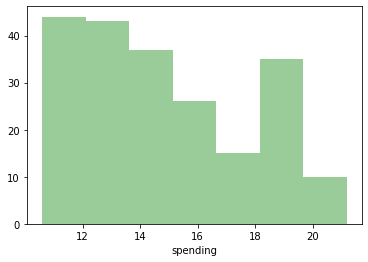

Boxplot ofspending
---------------------------------------------------------


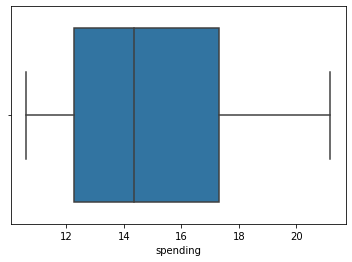

Description of advance_payments
---------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64  
Distribution of advance_payments
---------------------------------------------------------


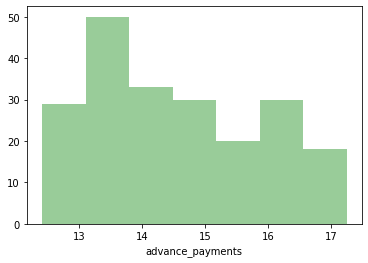

Boxplot ofadvance_payments
---------------------------------------------------------


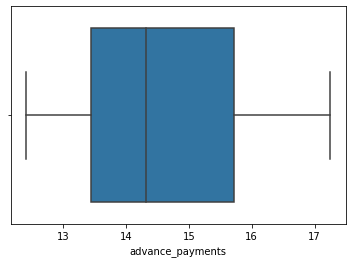

Description of probability_of_full_payment
---------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64  
Distribution of probability_of_full_payment
---------------------------------------------------------


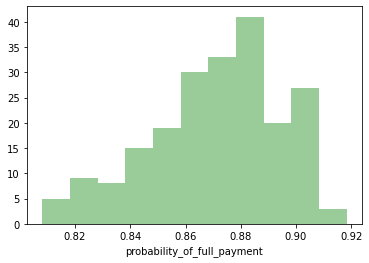

Boxplot ofprobability_of_full_payment
---------------------------------------------------------


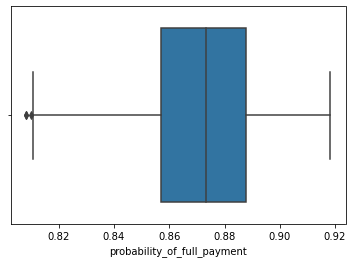

Description of current_balance
---------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64  
Distribution of current_balance
---------------------------------------------------------


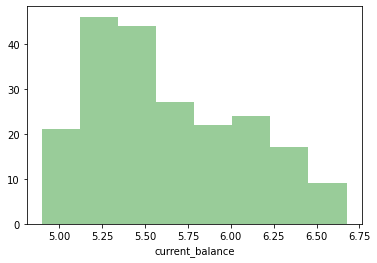

Boxplot ofcurrent_balance
---------------------------------------------------------


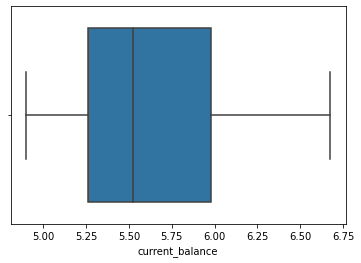

Description of credit_limit
---------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64  
Distribution of credit_limit
---------------------------------------------------------


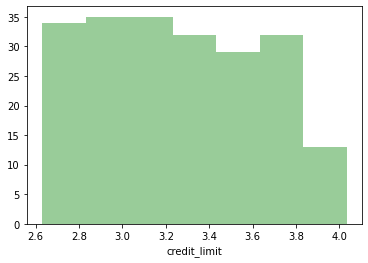

Boxplot ofcredit_limit
---------------------------------------------------------


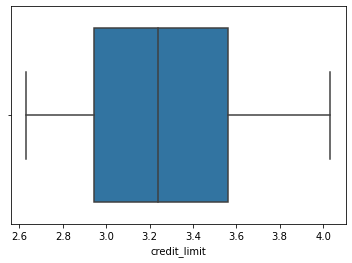

Description of min_payment_amt
---------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64  
Distribution of min_payment_amt
---------------------------------------------------------


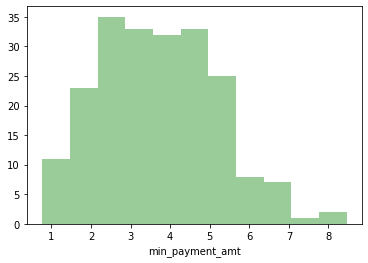

Boxplot ofmin_payment_amt
---------------------------------------------------------


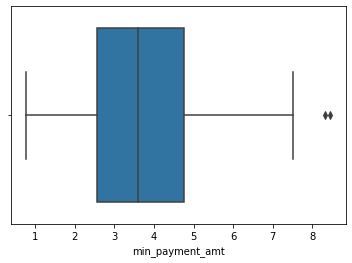

Description of max_spent_in_single_shopping
---------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64  
Distribution of max_spent_in_single_shopping
---------------------------------------------------------


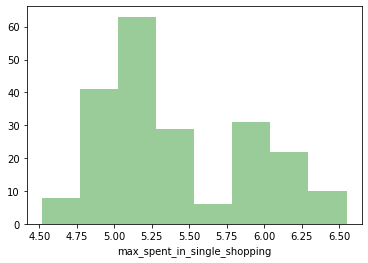

Boxplot ofmax_spent_in_single_shopping
---------------------------------------------------------


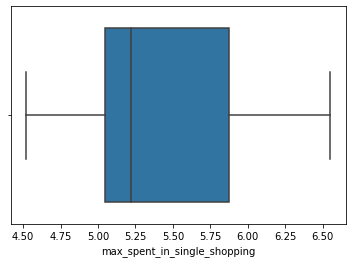

In [12]:
for x in lstnumariccolumns:
    univariateanalysis_numaric(x,20)

In [13]:
# Let's check the skewness values quantitatively
df.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

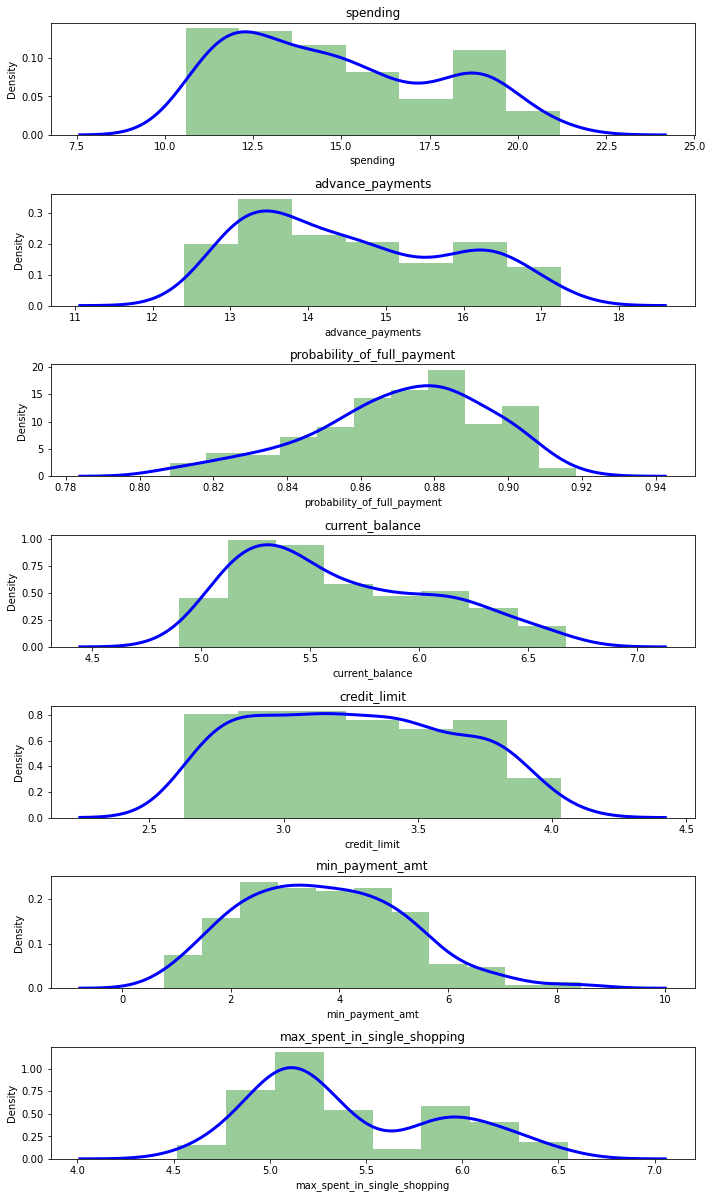

In [14]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 


plt.figure(figsize=(10,40))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout()

### Observation
Distribution is right skewed for all the variable except  "probability_of_full_payment" variable, which is left skewed.

## Multivariate Analysis

<Figure size 288x144 with 0 Axes>

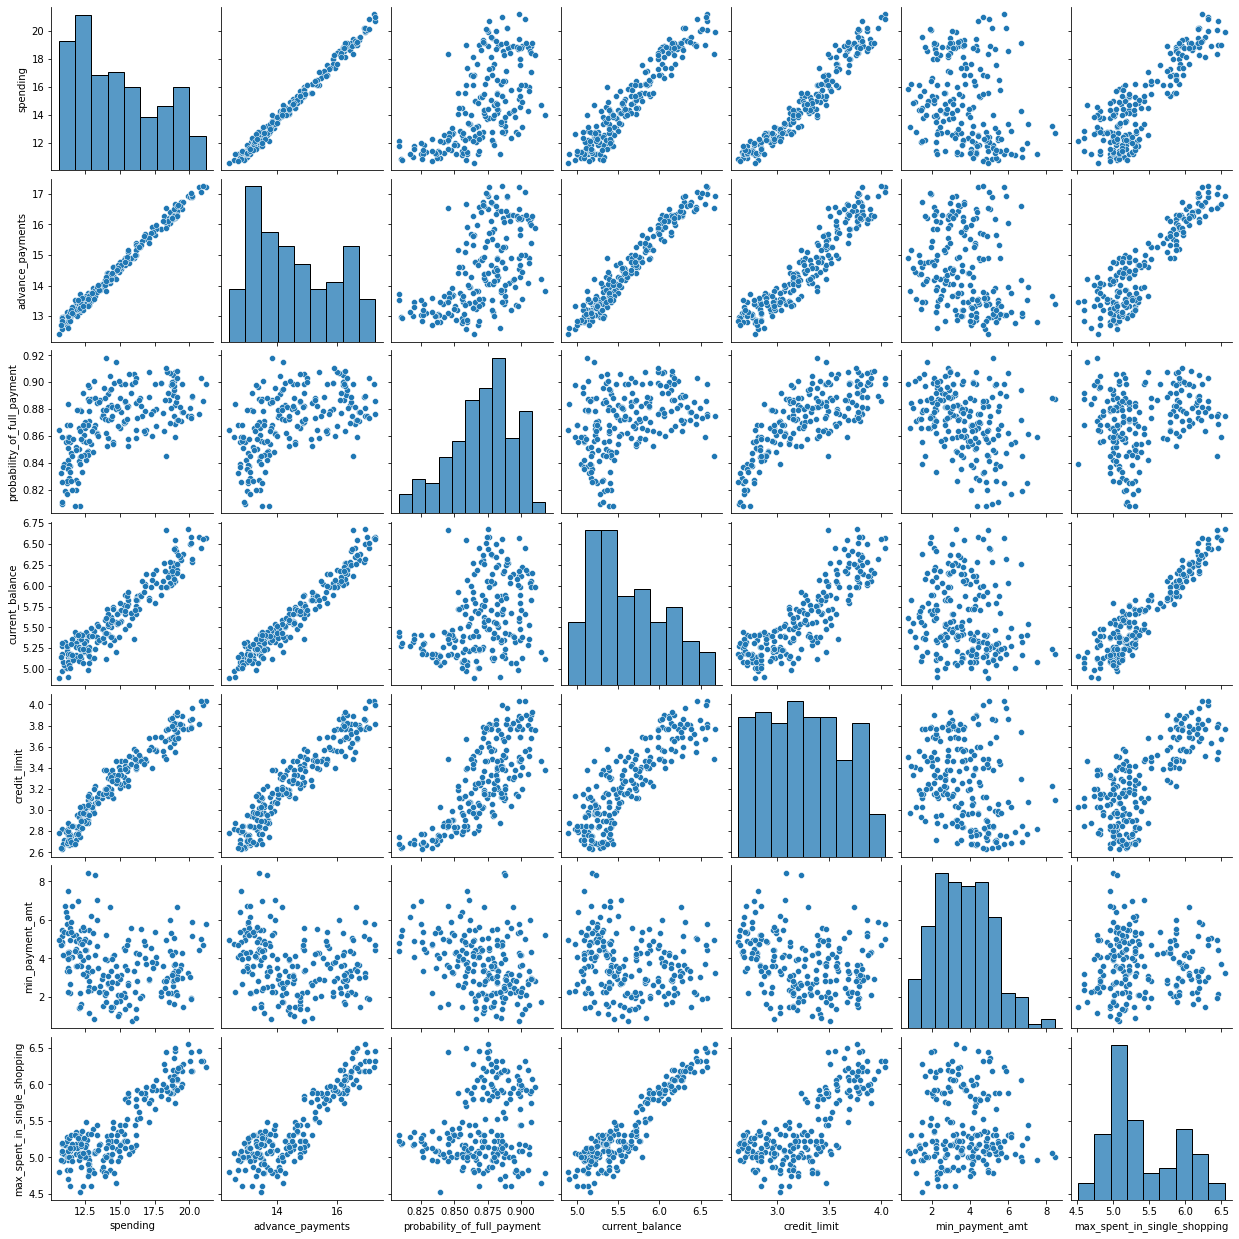

In [15]:
plt.figure(figsize=(4,2))
sns.pairplot(data = df);
plt.show()

- Pair plot shows the relationship between the variables in the form of scatterplot and the distribution of the variable in the form of histogram.
- From the graph, we can see that there is strong positive linear relationship between most of the variables like advance_payment and spending, current_balance and advance_payment . From the histogram we can see that almost all of the variables are right skewed but only probability_of_ful_payment is left skewed.


Observation:
- Strong positive correlation between 
        - spending & advance_payments, 
        - advance_payments & current_balance, 
        - credit_limit & spending
        - spending & current_balance
        - credit_limit & advance_payments
        - max_spent_in_single_shopping  current_balance

### Correlation plot

In [16]:
df.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


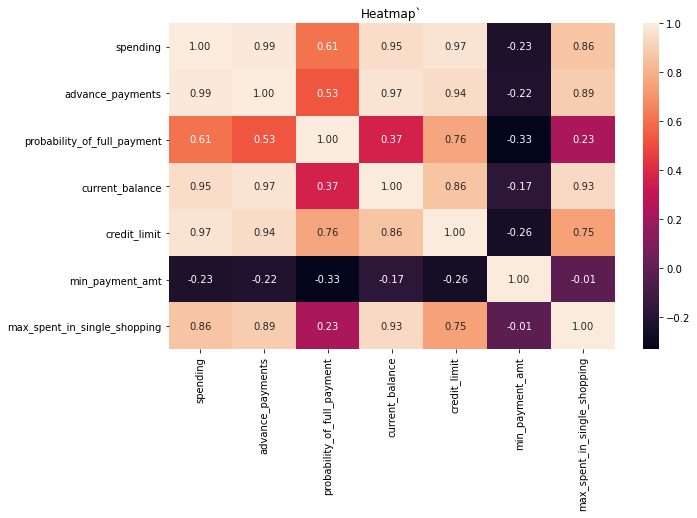

In [17]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.title('Heatmap`')
plt.show()

- From the correlation plot, we can see that various attributes of the car are highly correlated to each other. Correlation values near to 1 or -1 are highly positively correlated and highly negatively correlated respectively. Correlation values near to 0 are not correlated to each other.
- From the correlation plot we can see that min_payment_amt is highly negatively correlated to most of the variables.
- Then values near to 0 have no correlation and can be found in min_payment_amt and max_spent_in_single_shopping.
- We can find high positive correlation between advance_payments and spending, advance_payments and current_balance, credit_limit and spending from this we can say that people make advance payments before their spending’s and spend within their credit limit

### Copying the original data frame into new data frame

In [18]:
df_new = df.copy()

### Plotting the Boxplot for the data to check for the outliers

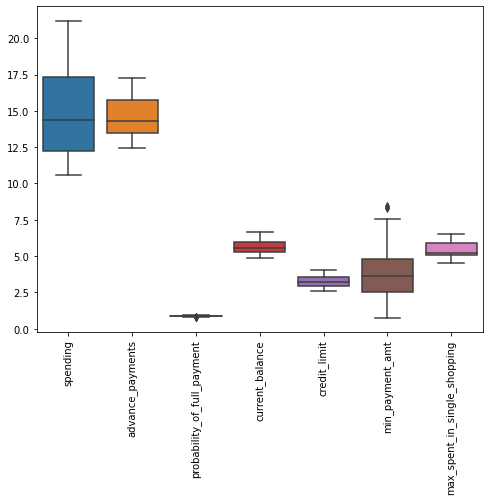

In [19]:
# Let us check presence of outliers
plt.figure(figsize=(8,6))
box = sns.boxplot(data=df_new)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

observation:

seems there are some outliers.

In [20]:
df.describe(percentiles=[.25,0.50,0.75,0.95])

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
95%,19.543000,16.731000,0.905330,6.447200,3.858650,6.177800,6.273000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


### Replacing Outliers with Median Values
In this technique, we replace the extreme values with median values. It is advised to not use mean values as they are affected by outliers. The first line of code below prints the 50th percentile value, or the median, which comes out to be ---. The second line prints the 95th percentile value, which comes out to be around ---. The third line of code below replaces all those values in the 'Loan_amount' variable, which are greater than the 95th percentile, with the median value. Finally, the fourth line prints summary statistics after all these techniques have been employed for outlier treatment.

In [21]:
print("Median value of probability_of_full_payment is ",df_new['probability_of_full_payment'].quantile(0.50)) 
print("95th percentile value of probability_of_full_payment is ",df_new['probability_of_full_payment'].quantile(0.95)) 
print(' ')
print("Median value of min_payment_amt is ",df_new['min_payment_amt'].quantile(0.50)) 
print("95th percentile value of min_payment_amt is ",df_new['min_payment_amt'].quantile(0.95)) 


Median value of probability_of_full_payment is  0.8734500000000001
95th percentile value of probability_of_full_payment is  0.90533
 
Median value of min_payment_amt is  3.599
95th percentile value of min_payment_amt is  6.1777999999999995


In [22]:
df['probability_of_full_payment'] = np.where(df['probability_of_full_payment'] > 0.873450, 0.905330, df['probability_of_full_payment'])
df['min_payment_amt'] = np.where(df['min_payment_amt'] > 3.599000, 6.177800, df['min_payment_amt'])
df_new.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


### Observation
The outlier treatment has been done and now we are good to go.

<AxesSubplot:title={'center':'probability_of_full_payment'}, xlabel='probability_of_full_payment'>

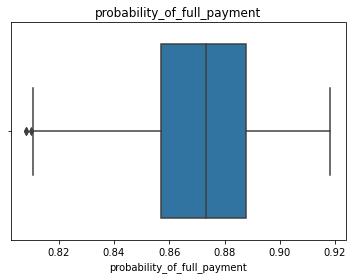

In [23]:
plt.title('probability_of_full_payment')
sns.boxplot(df_new['probability_of_full_payment'],orient='horizondal')

### Observation
Though we did treated the outlier, we still see one as per the boxplot, it is okay, as it is no extrme and on lower band.

### Question 1.2  Do you think scaling is necessary for clustering in this case? Justify



- Yes, scaling is necessary for the data, because the variables 'advance_payments' and 'spending' have their values in higher (in ten’s) compared to others (one’s) so they dominate more.


- Scaling will have all the values in the relative same range.


- we will be using zscore to standarised the data to relative same scale -3 to +3.

- Some values are in thousands, some in hundreds, so the values are imbalanced. We can't process further without scaling. 


- More over Clustering algorithms such as K-means need feature scaling. Since, clustering techniques use Euclidean Distance to form the clusters.

In [24]:
#Using Zscore for scaling/standardisation
from scipy.stats import zscore
df_new_scaled= df_new.apply(zscore)
df_new_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [25]:
df_new_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,9.148766e-16,1.002389,-1.466714,-0.887955,-0.169674,0.846599,2.181534
advance_payments,210.0,1.097006e-16,1.002389,-1.649686,-0.851433,-0.183664,0.887069,2.065260
probability_of_full_payment,210.0,1.260896e-15,1.002389,-2.668236,-0.598079,0.103993,0.711677,2.006586
current_balance,210.0,-1.358702e-16,1.002389,-1.650501,-0.828682,-0.237628,0.794595,2.367533
credit_limit,210.0,-2.790757e-16,1.002389,-1.668209,-0.834907,-0.057335,0.804496,2.055112
min_payment_amt,210.0,5.418946e-16,1.002389,-1.956769,-0.759148,-0.067469,0.712379,3.170590
max_spent_in_single_shopping,210.0,-1.935489e-15,1.002389,-1.813288,-0.740495,-0.377459,0.956394,2.328998


### Question 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

### Creating the Dendrogram

In [26]:
#importing dendrogram and linkage module
from scipy.cluster.hierarchy import dendrogram, linkage

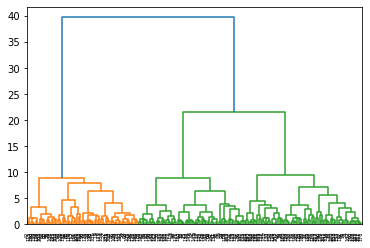

In [27]:
wardlink = linkage(df_new_scaled, method = 'ward')
dend= dendrogram(wardlink)

### Cutting Dendrogram with suitable clusters

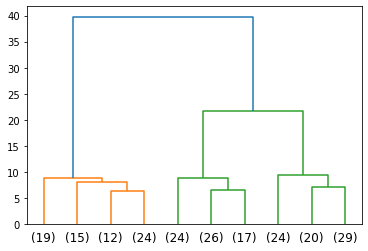

In [28]:
#If we truncate the graph to last 10 p values then,

dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10)

### Clustering techniques 
The method used for clustering is fcluster. Here we are using 3 criteria’s for forming flat clusters
- The linkage formed using the scaled data.
- The cut off value
- The criterion has 2 methods
 - Distance
 - maxcluster

Here we have used both the methods, we can choose any one of them, both gives
almost the same results.
- The linkage used is ward link method.

In [29]:
# Importing fcluster module to create clusters
from scipy.cluster.hierarchy import fcluster

In [30]:
#Method 1

clusters1 = fcluster(wardlink, 3, criterion='maxclust')
clusters1


array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [31]:
# Method 2

clusters2 = fcluster(wardlink, 23, criterion='distance')
clusters2

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [32]:
clusters3=df.copy()

In [33]:
clusters3['clusters-1'] = clusters1

In [34]:
clusters3.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-1
0,19.94,16.92,0.90533,6.675,3.763,3.2520,6.550,1
1,15.99,14.89,0.90533,5.363,3.582,3.3360,5.144,3
2,18.95,16.42,0.90533,6.248,3.755,3.3680,6.148,1
3,10.83,12.96,0.80990,5.278,2.641,6.1778,5.185,2
4,17.99,15.86,0.90533,5.890,3.694,2.0680,5.837,1


In [35]:
clusters4=df.copy()
clusters4['clusters-2'] = clusters2
clusters4.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-2
0,19.94,16.92,0.90533,6.675,3.763,3.2520,6.550,1
1,15.99,14.89,0.90533,5.363,3.582,3.3360,5.144,2
2,18.95,16.42,0.90533,6.248,3.755,3.3680,6.148,1
3,10.83,12.96,0.80990,5.278,2.641,6.1778,5.185,2
4,17.99,15.86,0.90533,5.890,3.694,2.0680,5.837,1


- As we can see both methods gives almost the same results.

In [36]:
clusters3['clusters-1'].value_counts().sort_index()

1    70
2    67
3    73
Name: clusters-1, dtype: int64

In [37]:
aggdata_w=clusters3.groupby('clusters-1').mean()
aggdata_w['Freq']=clusters3['clusters-1'].value_counts().sort_index()
aggdata_w

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-1,,,,,,,,
1,18.371429,16.145429,0.896023,6.158171,3.684629,4.446140,6.017371,70
2,11.872388,13.257015,0.850375,5.238940,2.848537,5.804304,5.122209,67
3,14.199041,14.233562,0.888269,5.478233,3.226452,2.858233,5.086178,73


- The clusters are segregated based on spending variable.

- We for cluster grouping based on the dendrogram looks good. Did the further analysis, and based on the dataset had gone for 3 group cluster solution based on the hierarchical clustering

- Also in real time, there colud have been more variables value captured - tenure, BALANCE_FREQUENCY, balance, purchase, installment of purchase, others.


- And three group cluster solution gives a pattern based on high/medium/low spending with max_spent_in_single_shopping (high value item) and probability_of_full_payment(payment made).

### Question 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [38]:
from sklearn.cluster import KMeans

In [39]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 1,random_state=1)

# Fit K means on the scaled_df
k_means.fit(df_new_scaled)
k_means.inertia_

1469.9999999999998

In [40]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(df_new_scaled)
k_means.inertia_

659.171754487041

In [41]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_new_scaled)
k_means.inertia_

430.6589731513006

In [42]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_new_scaled)
k_means.inertia_

371.38509060801096

In [43]:
wss=[]

In [44]:
 for i in range(1,11):
        KM = KMeans(n_clusters=i)
        KM.fit(df_new_scaled)
        wss.append(KM.inertia_)

In [45]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.29354819439664,
 332.5849640648484,
 289.46717056412893,
 262.54630293091617,
 239.02326090609762,
 221.32412076695854,
 204.73270912011722]

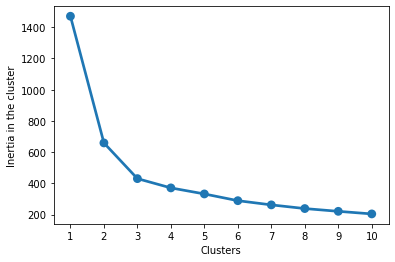

In [46]:
a=[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(a, wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

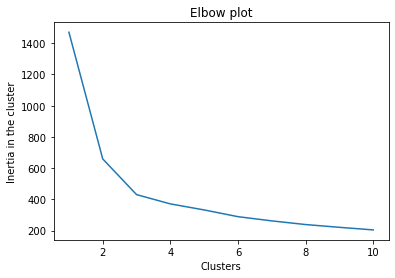

In [47]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.title('Elbow plot')
plt.show()

Observation:

From the above plot (Elbow curve) we can see that there is a significant drop from 2 to 3
and after 3 the inertia start decreasing in a linear fashion so we can choose (n-cluster) 3 as
optimum number of clusters.


### KMeans with K=4

In [48]:
k_means_4 = KMeans(n_clusters = 4,random_state=1)
k_means_4.fit(df_new_scaled)
labels_4 = k_means.labels_

In [49]:
kmeans4_dataset=df.copy()

In [50]:
kmeans4_dataset["Clus_kmeans"] = labels_4
kmeans4_dataset.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.90533,6.675,3.763,3.2520,6.550,3
1,15.99,14.89,0.90533,5.363,3.582,3.3360,5.144,1
2,18.95,16.42,0.90533,6.248,3.755,3.3680,6.148,3
3,10.83,12.96,0.80990,5.278,2.641,6.1778,5.185,0
4,17.99,15.86,0.90533,5.890,3.694,2.0680,5.837,3


### Cluster evaluation for 4 clusters: the silhouette score

In [51]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [52]:
# Calculating silhouette_score
silhouette_score(df_new_scaled,labels_4,random_state=1)

0.3276547677266193

In [53]:
from sklearn import metrics

In [54]:
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(df_new_scaled)
    scores.append(metrics.silhouette_score(df_new_scaled, km.labels_))
    
scores

[0.46577247686580914,
 0.4007270552751299,
 0.3276547677266193,
 0.2827335237380384,
 0.28859801403258994,
 0.2819058746607507,
 0.26644334449887014,
 0.2583120167794957,
 0.2523041928840054]

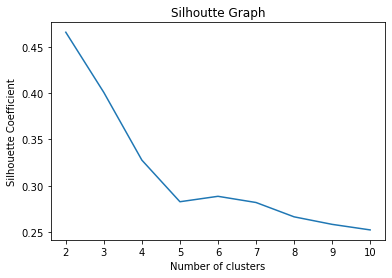

In [56]:
#plotting the sc scores
plt.plot(k_range,scores)
plt.title('Silhoutte Graph')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Observation:

- From the above silhouette graph we can see that n_cluster = 3 or 4 has the highest value compared to others.
 
 
 As we can say that :
- If the silhouette score is close to +1 then we can say the clusters are well separated from each other
- If the silhouette score is close to 0, then we can say the clusters are not separated from each other.
- So from the above statement we can say that the best cluster to choose is 3 to be optimum


In [58]:
sil_width = silhouette_samples(df_new_scaled,labels_4)

In [59]:
kmeans4_dataset["sil_width"] = sil_width
kmeans4_dataset.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.90533,6.675,3.763,3.2520,6.550,3,0.445327
1,15.99,14.89,0.90533,5.363,3.582,3.3360,5.144,1,0.059262
2,18.95,16.42,0.90533,6.248,3.755,3.3680,6.148,3,0.443575
3,10.83,12.96,0.80990,5.278,2.641,6.1778,5.185,0,0.528646
4,17.99,15.86,0.90533,5.890,3.694,2.0680,5.837,3,0.081568


In [57]:
silhouette_samples(df_new_scaled,labels_4).min()

-0.05384082699360047

### 3 Cluster Solution

In [58]:
km_3= KMeans(n_clusters=3,random_state=123)

### Fitting the Kmeans

In [59]:
#fitting the Kmeans 
km_3.fit(df_new_scaled)
km_3.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

Cluster 1 contains customers who spends average, so they majority of middle class
people fall under this cluster.
1) The middle class people mostly will be married, so they'll be in need of money, giving low interest personal loans / for vehicles can draw most people. As their next plan will be buying a car / house / paying fees. So they see it as a good source comparatively to other loans offers.

2) Giving offers to most used e-commerce sites during festival times drives more customers to spend on household items. 

Cluster 2 contains customers who spends more, so in order to maintain them or to make them spend more we have to segregate them based on gender,
1) For female customers, they tend to spend more on cosmetics, health and beauty products. Go giving offers on specific brands, which is bit costlier will drive them to spend more to maintain their status.

2) This suits for both the genders, to update their gadgets, as it has become a status mark to use certain products, so giving offers on such products during the product release will drive more customers by giving promotions.

### Question 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [69]:
aggdata_w.T

clusters-1,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.896023,0.850375,0.888269
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,4.446140,5.804304,2.858233
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Freq,70.000000,67.000000,73.000000


### Cluster Group Profiles
Group 1 : High Spending

Group 3 : Medium Spending

Group 2 : Low Spending

### Promotional Strategies for each cluster

### Group 1 : High Spending Group
- Giving any reward points might increase their purchases.
- maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment
- Increase there credit limit and 
- Increase spending habits
- Give loan against the credit card, as they are customers with good repayment record.
- Tie up with luxary brands, which will drive more one_time_maximun spending

### Group 3 : Medium Spending Group
- They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. 
- Promote premium cards/loyality cars to increase transcations.
- Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourge them to spend more

### Group 2 : Low Spending Group
- customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.
- Increase there spending habits by tieing up with grocery stores, utlities (electircity, phone, gas, others)

### Problem 2: CART-RF-ANN
### Problem Statement:
### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

### Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)

### Importing all the necessary libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')

### Question 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

### Loading the data in to data frame.

In [79]:
data_df=pd.read_csv('insurance_part2_data.csv')

 ### Checking the Head of the data.

In [80]:
data_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


### Checking the info of the data.

In [81]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


### Observatiom
- 10 variables
- Age, Commision, Duration, Sales are numeric variable
- rest are categorial variables
- 3000 records, no missing one
- 9 independant variable and one target variable - Clamied

### Checking for missing values.

In [82]:
data_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

### Observation
No missing values found.

### Descriptive Statistics Summary

In [83]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


### Observation
- duration has negative value, it is not possible. Wrong entry.
- Commision & Sales- mean and median varies signficantly

In [84]:
data_df.shape

(3000, 10)

### Geting unique counts of all Objects.

In [85]:
print('Agency_Code \n',data_df.Agency_Code.value_counts())
print('\n')
print('Type \n',data_df.Type.value_counts())
print('\n')
print('Claimed \n',data_df.Claimed.value_counts())
print('\n')
print('Channel \n',data_df.Channel.value_counts())
print('\n')
print('Product Name \n',data_df['Product Name'].value_counts())
print('\n')
print('Destination \n',data_df.Destination.value_counts())

Agency_Code 
 EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


Type 
 Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


Claimed 
 No     2076
Yes     924
Name: Claimed, dtype: int64


Channel 
 Online     2954
Offline      46
Name: Channel, dtype: int64


Product Name 
 Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64


Destination 
 ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64


### Checking for duplicates

In [86]:
# Are there any duplicates ?
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data_df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


### observation
Not removing duplicates

Though it shows there are 139 records, but it can be of different customers, there is no customer ID or any unique identifier, so I am not dropping them off.

### Univariate analysis
We will be doing univariate analysis of Numairc variables first, then move to catagorical variables.

## Age Variable

In [87]:
print('Range of values: ', data_df['Age'].max()-data_df['Age'].min())
data_df['Age'].describe()

Range of values:  76


count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64

<AxesSubplot:title={'center':'Boxplot of Age'}, xlabel='Age'>

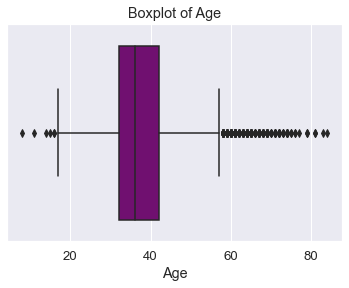

In [88]:
plt.title('Boxplot of Age')
sns.boxplot(data_df['Age'],orient='horizondal',color='purple')

Variable Age have many outliers, lets see about further variables.

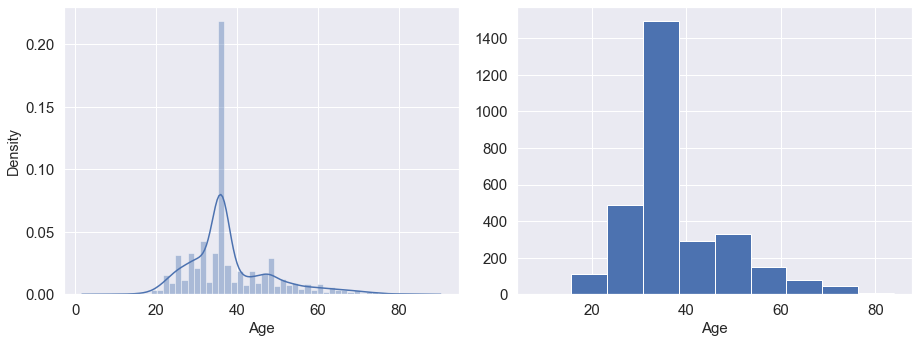

In [89]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(data_df['Age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data_df['Age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Commision variable

In [90]:
print('Range of values: ', data_df['Commision'].max()-data_df['Commision'].min())
data_df['Commision'].describe()

Range of values:  210.21


count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64

<AxesSubplot:title={'center':'Boxplot of Commision'}, xlabel='Commision'>

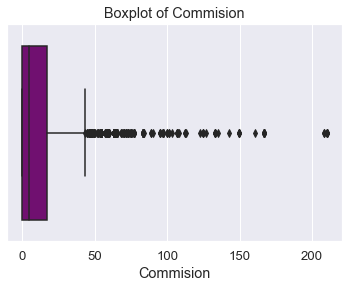

In [91]:
plt.title('Boxplot of Commision')
sns.boxplot(data_df['Commision'],orient='horizondal',color='purple')

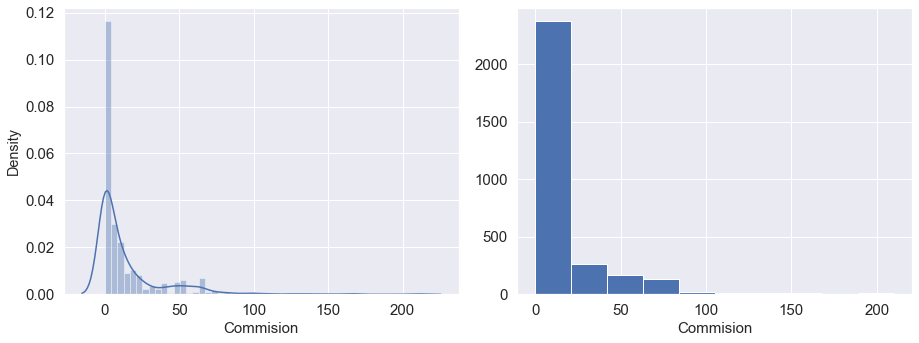

In [92]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(data_df['Commision'],ax=ax2)
ax2.set_xlabel('Commision', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data_df['Commision'])
ax3.set_xlabel('Commision', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Duration variable

In [93]:
print('Range of values: ', data_df['Duration'].max()-data_df['Duration'].min())
data_df['Duration'].describe()

Range of values:  4581


count    3000.000000
mean       70.001333
std       134.053313
min        -1.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64

<AxesSubplot:title={'center':'Boxplot of Duration'}, xlabel='Duration'>

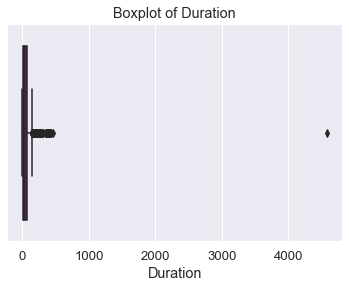

In [94]:
plt.title('Boxplot of Duration')
sns.boxplot(data_df['Duration'],orient='horizondal',color='purple')

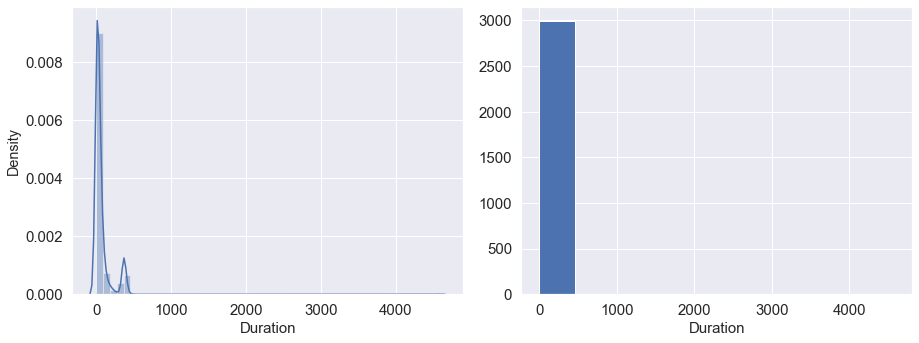

In [95]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(data_df['Duration'],ax=ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data_df['Duration'])
ax3.set_xlabel('Duration', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Sales Variable

In [96]:
print('Range of values: ', data_df['Sales'].max()-data_df['Sales'].min())
data_df['Sales'].describe()

Range of values:  539.0


count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64

<AxesSubplot:title={'center':'Boxplot of Sales'}, xlabel='Sales'>

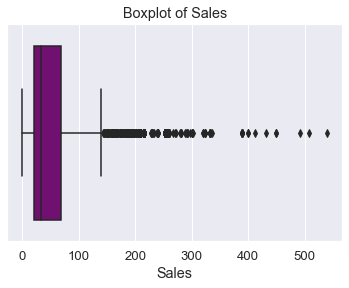

In [97]:
plt.title('Boxplot of Sales')
sns.boxplot(data_df['Sales'],orient='horizondal',color='purple')

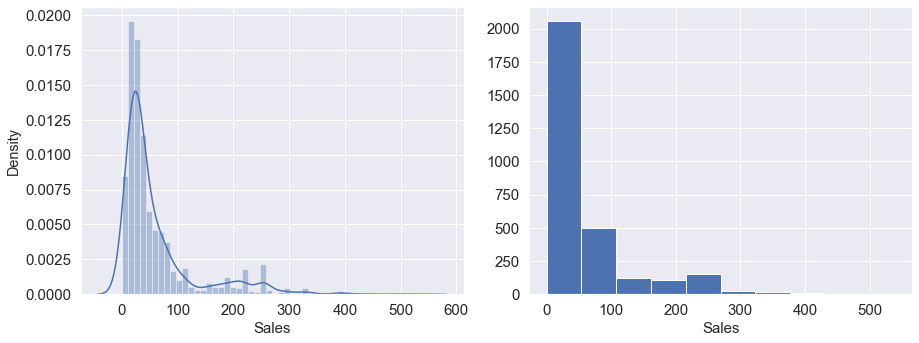

In [98]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(data_df['Sales'],ax=ax2)
ax2.set_xlabel('Sales', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data_df['Sales'])
ax3.set_xlabel('Sales', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Observation:
There are outliers in all the variables, but the sales and commision can be a geneui business value. Random Forest and CART can handle the outliers. Hence, Outliers are not treated for now, we will keep the data as it is.

I will treat the outliers for the ANN model to compare the same after the all the steps just for comparsion.

### Categorical Variable
we will be plotting countplot and boxplot for all the categorical variables
## Agency_Code

<AxesSubplot:title={'center':'Countplot for Agency_Code'}, xlabel='Agency_Code', ylabel='count'>

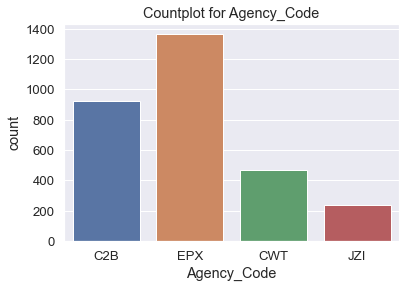

In [99]:
# plotting Countplot for gency_Code
plt.title('Countplot for Agency_Code')
sns.countplot(data=data_df,x='Agency_Code')

<AxesSubplot:title={'center':'Boxplot for Agency_Code'}, xlabel='Agency_Code', ylabel='Sales'>

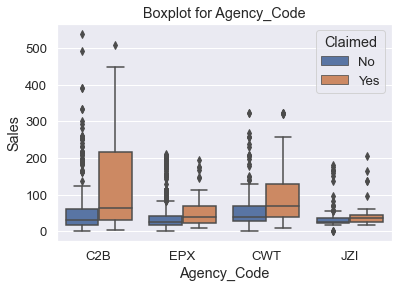

In [100]:
# Plotting Boxplot for Agency_Code
plt.title('Boxplot for Agency_Code')
sns.boxplot(data=data_df,x='Agency_Code',y='Sales',hue='Claimed')

## Type Variable

<AxesSubplot:title={'center':'Countplot for Type'}, xlabel='Type', ylabel='count'>

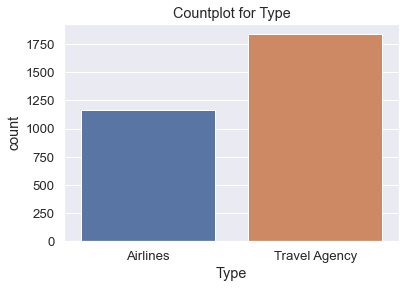

In [101]:
# plotting Countplot for Type
plt.title('Countplot for Type')
sns.countplot(data=data_df,x='Type')

<AxesSubplot:title={'center':'Boxplot for Type'}, xlabel='Type', ylabel='Sales'>

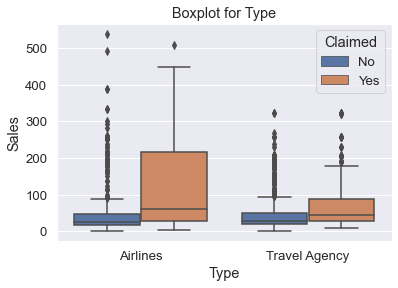

In [102]:
# plotting boxplot for Type
plt.title('Boxplot for Type')
sns.boxplot(data=data_df,x='Type',y='Sales',hue='Claimed')

## Channel Variable

<AxesSubplot:title={'center':'Countplot for Channel'}, xlabel='Channel', ylabel='count'>

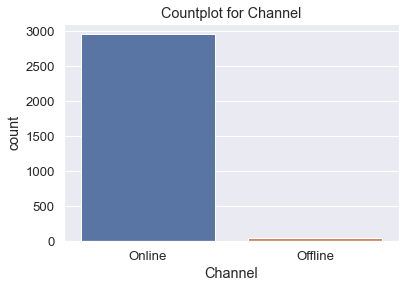

In [103]:
# plotting Countplot for Channel 
plt.title('Countplot for Channel')
sns.countplot(data=data_df,x='Channel')

<AxesSubplot:title={'center':'boxplot for Channel'}, xlabel='Channel', ylabel='Sales'>

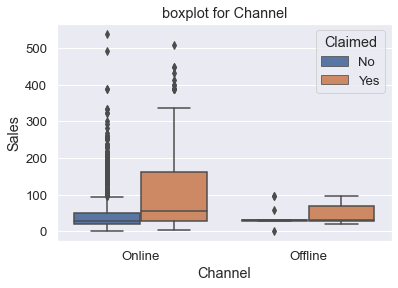

In [104]:
# plotting boxplot for Channel
plt.title('boxplot for Channel')
sns.boxplot(data=data_df,x='Channel',y='Sales',hue='Claimed')

## Product Name Variable

<AxesSubplot:title={'center':'countplot for Product Name'}, xlabel='Product Name', ylabel='count'>

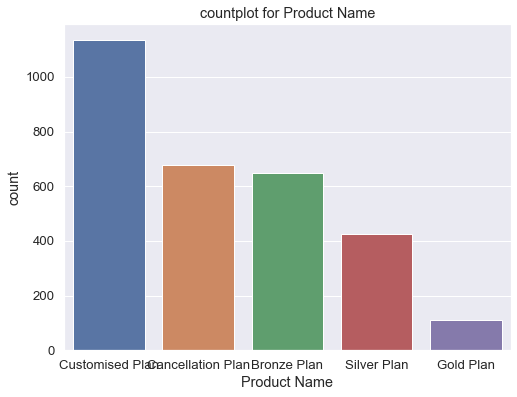

In [105]:
#plotting countplot for Product Name
plt.figure(figsize=(8,6))
plt.title('countplot for Product Name')
sns.countplot(data=data_df,x='Product Name')

<AxesSubplot:title={'center':'boxplot for Product Name'}, xlabel='Product Name', ylabel='Sales'>

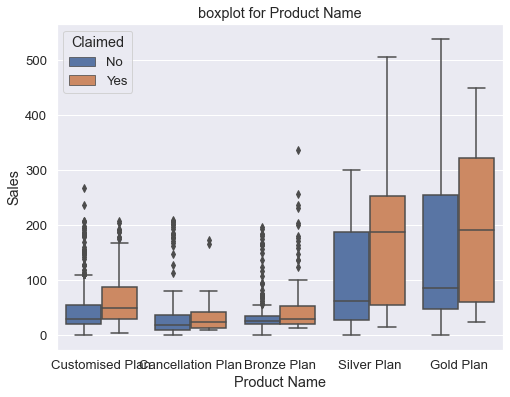

In [106]:
#plotting boxplot for Product Name
plt.figure(figsize=(8,6))
plt.title('boxplot for Product Name')
sns.boxplot(data=data_df,x='Product Name',y='Sales',hue='Claimed')

## Destination Variable


<AxesSubplot:title={'center':'countplot for Destination'}, xlabel='Destination', ylabel='count'>

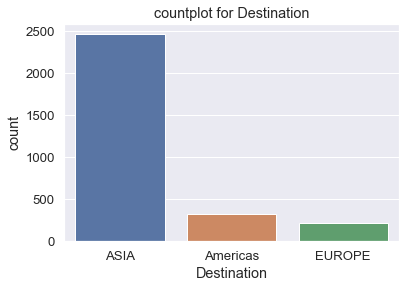

In [107]:
#plotting Countplot for Destination 
plt.title('countplot for Destination')
sns.countplot(data=data_df,x='Destination')

<AxesSubplot:title={'center':'boxplot for Destination'}, xlabel='Destination', ylabel='Sales'>

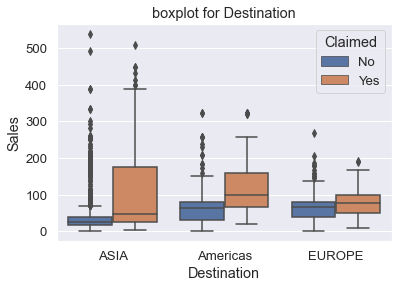

In [108]:
#plotting boxplot for Destination 
plt.title('boxplot for Destination')
sns.boxplot(data=data_df,x='Destination',y='Sales',hue='Claimed')

### Checking pairwise distribution of the continuous variables

<Figure size 144x72 with 0 Axes>

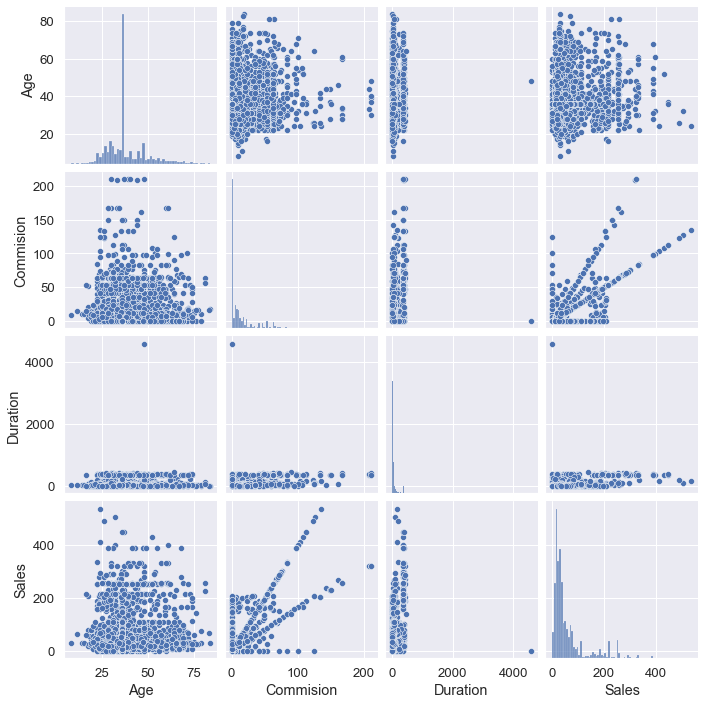

In [109]:
plt.figure(figsize=(2,1))
sns.pairplot(data_df[['Age', 'Commision','Duration', 'Sales']])

### Checking for Correlations

<AxesSubplot:>

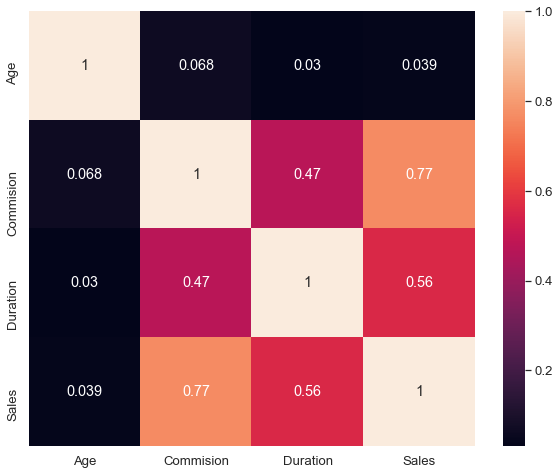

In [110]:
# constructing heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(data_df[['Age', 'Commision', 'Duration', 'Sales']].corr(), annot=True)

#### From the heat map we can see that,
- There is no much linear correlation between Age and other variables

- There is only few positive correlation with Commission and sales, Duration and Sales

### Converting all objects to categorical codes
Here we will convert the object data type into numerical data type as the algorithms
will only accept numerical data.

In [111]:
for feature in data_df.columns: 
    if data_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data_df[feature].unique()))
        print(pd.Categorical(data_df[feature].unique()).codes)
        data_df[feature] = pd.Categorical(data_df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [112]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


Most of the data was categorical, so first we converted them into numerical shown above.

In [113]:
data_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


### Proportion of 1s and 0s

In [114]:
data_df.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [115]:
print(data_df.Claimed.value_counts())
print('%1s = ',2076/(2076+924)*100)
print('%0s = ',924/(2076+924)*100)

0    2076
1     924
Name: Claimed, dtype: int64
%1s =  69.19999999999999
%0s =  30.8


### Question 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network.

 Extracting the target column into separate vectors for training set and test set .
 
 we will drop the Dependent variable = ‘Claimed’ and separate them using
train_test_split. So extracting the target variable.



In [116]:
X = data_df.drop("Claimed", axis=1)

y = data_df.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [117]:
# Scaling the attributes.
from scipy.stats import zscore
X_scaled=X.apply(zscore)
X_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


### Splitting data into training and test set

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X_scaled, y, test_size=.30, random_state=5)

### Checking the dimensions of the training and test data


In [42]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',2100+900)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
Total Obs 3000


### Building a Decision Tree Classifier

In [43]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [20,30,40,50,60], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

- The criterion gini is what based on which the variables are chosen for the split.
- Max_depth is the maximum levels of trees can extend for best results
- Min_sample_leaf is the value of the last child note to which it extends.
- Min_sample_split is the value that the leaf node should contain during the split.


In [44]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=150,
                       random_state=1)

### Generating Tree

In [45]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

The above code will save a .dot file in your working directory.
WebGraphviz is Graphviz in the Browser.
Copy paste the contents of the file into the link below to get the visualization
http://webgraphviz.com/

### Variable Importance - DTCL

In [47]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.596448
Sales         0.207778
Product Name  0.108327
Duration      0.034766
Commision     0.033559
Age           0.019123
Type          0.000000
Channel       0.000000
Destination   0.000000


### Predicting on Training and Test dataset


In [48]:
ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl = best_grid_dtcl.predict(X_test)

### Getting the Predicted Classes and Probability

In [49]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.720635,0.279365
1,0.979452,0.020548
2,0.914842,0.085158
3,0.552941,0.447059
4,0.914842,0.085158


### Building a Random Forest Classifier


In [50]:
param_grid_rfcl = {
    'max_depth': [7],
    'max_features': [3],
    'min_samples_leaf': [10], 
    'min_samples_split': [50], 
    'n_estimators': [500] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

- Max_depth is the maximum levels of trees can extend for best results
- Min_sample_leaf is the value of the last child note to which it extends.
- Min_sample_split is the value that the leaf node should contain during the split.
- N_estimators is the number of trees we want to build before the average of predictions.

In [51]:
grid_search_rfcl.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [7], 'max_features': [3],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [500]})

In [52]:
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

{'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 500}


RandomForestClassifier(max_depth=7, max_features=3, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=500, random_state=1)

### Predicting the Training and Testing data

In [53]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

### Getting the Predicted Classes and Probability

In [54]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.776371,0.223629
1,0.974524,0.025476
2,0.900425,0.099575
3,0.634812,0.365188
4,0.864956,0.135044


### Variable Importance via Random Forest

In [55]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.273173
Product Name  0.227873
Sales         0.159985
Commision     0.132629
Duration      0.080944
Type          0.067420
Age           0.045620
Destination   0.009928
Channel       0.002427


### Building a Neural Network Classifier

In [56]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200], 
    'max_iter': [2500,3000,4000], 
    'solver': ['adam'], 
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

- Hidden_layer is the number of middle layer containing neurons and as the size increases the output will be good.
- Max_iter Is the max number of iterations the model has to g through.
- Random_state is the value to store the parameter value same even after number of times it runs, as it is an random method it produces different value for parameters each time, so it Is important to have this parameter in all models.
- Tolerance rate is a value in which smaller the tolerance more number of iterations occur, higher the tolerance less the number of iterations.


All the above parameters are chosen at random based on the parameter grid search method.
Based on these parameters we will build the models by fitting the data into the algorithm.

In [57]:
grid_search_nncl.fit(X_train, train_labels)
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

### Predicting the Training and Testing data


In [58]:
ytrain_predict_nncl = best_grid_nncl.predict(X_train)
ytest_predict_nncl = best_grid_nncl.predict(X_test)

### Getting the Predicted Classes and Probability

In [59]:
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.822676,0.177324
1,0.933407,0.066593
2,0.918772,0.081228
3,0.688933,0.311067
4,0.913425,0.086575


### Question 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

### CART - AUC and ROC for the training data

AUC: 0.832


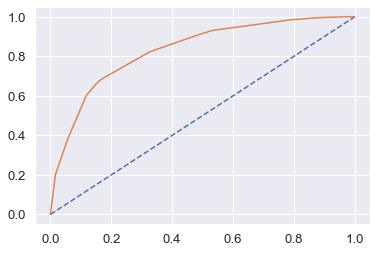

In [60]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### CART -AUC and ROC for the test data


AUC: 0.811


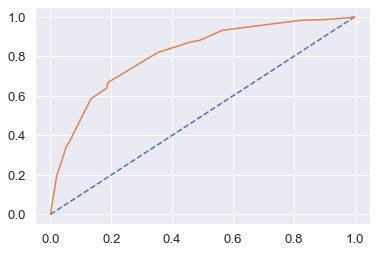

In [61]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### CART Confusion Matrix and Classification Report for the training data

In [62]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1281,  172],
       [ 257,  390]], dtype=int64)

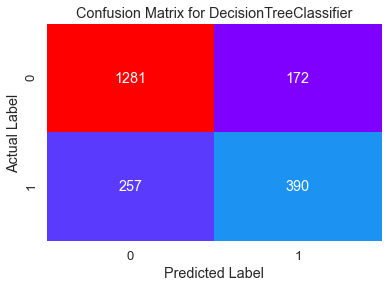

In [63]:
confusion_matrix(train_labels, ytrain_predict_dtcl)
sns.heatmap(confusion_matrix(train_labels, ytrain_predict_dtcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

### Train data accuracy


In [64]:
cart_train_acc=best_grid_dtcl.score(X_train,train_labels) 
cart_train_acc

0.7957142857142857

In [65]:
print((1281+390)/(1281+172+257+390))

0.7957142857142857


In [66]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1453
           1       0.69      0.60      0.65       647

    accuracy                           0.80      2100
   macro avg       0.76      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



In [67]:
cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.69
cart_train_recall  0.6
cart_train_f1  0.65


### CART Confusion Matrix and Classification Report for the testing data

In [68]:
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[540,  83],
       [115, 162]], dtype=int64)

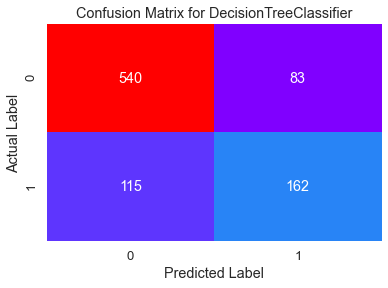

In [69]:
confusion_matrix(test_labels, ytest_predict_dtcl)
sns.heatmap(confusion_matrix(test_labels, ytest_predict_dtcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

### Test data accuracy

In [70]:
cart_test_acc=best_grid_dtcl.score(X_test,test_labels)
cart_test_acc

0.78

In [71]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       623
           1       0.66      0.58      0.62       277

    accuracy                           0.78       900
   macro avg       0.74      0.73      0.73       900
weighted avg       0.77      0.78      0.78       900



In [72]:
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.66
cart_test_recall  0.58
cart_test_f1  0.62


### Cart Conclusion

### Train Data:
- AUC: 83%
- Accuracy: 79%
- Precision: 60%
- f1-Score: 65%

### Test Data:
- AUC: 81%
- Accuracy: 78%
- Precision: 66%
- f1-Score: 62%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.


### RF Confusion Matrix and Classification Report for the training data

In [73]:
confusion_matrix(train_labels,ytrain_predict_rfcl)

array([[1297,  156],
       [ 254,  393]], dtype=int64)

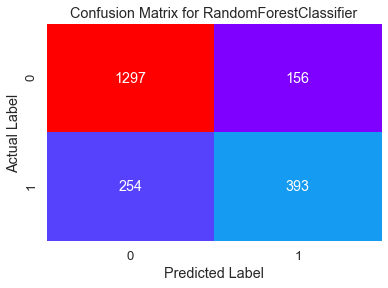

In [74]:
confusion_matrix(train_labels,ytrain_predict_rfcl)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_rfcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [75]:
#Train data accuracy
rf_train_acc=best_grid_rfcl.score(X_train,train_labels) 
rf_train_acc

0.8047619047619048

In [76]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1453
           1       0.72      0.61      0.66       647

    accuracy                           0.80      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.80      0.80      2100



In [77]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.72
rf_train_recall  0.61
rf_train_f1  0.66


Area under Curve is 0.8606677438673491


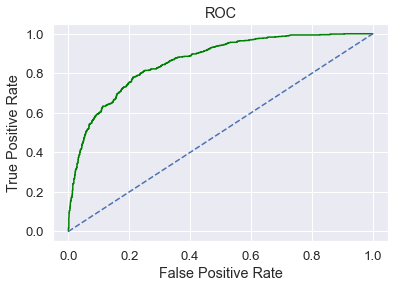

In [78]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

### RF Confusion Matrix and Classification Report for the Test data

In [79]:
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[551,  72],
       [121, 156]], dtype=int64)

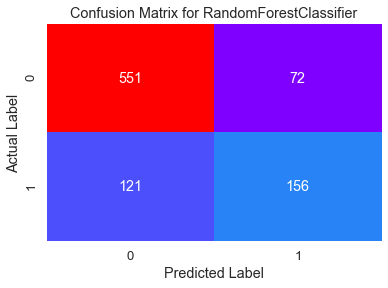

In [80]:
confusion_matrix(test_labels,ytest_predict_rfcl)
sns.heatmap(confusion_matrix(test_labels,ytest_predict_rfcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [81]:
# Test data accuracy
rf_test_acc=best_grid_rfcl.score(X_test,test_labels)
rf_test_acc

0.7855555555555556

In [82]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       623
           1       0.68      0.56      0.62       277

    accuracy                           0.79       900
   macro avg       0.75      0.72      0.73       900
weighted avg       0.78      0.79      0.78       900



In [83]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.68
rf_test_recall  0.56
rf_test_f1  0.62


Area under Curve is 0.8189006264088403


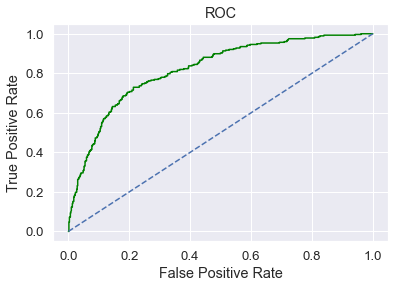

In [84]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

### Random Forest Conclusion

### Train Data:
- AUC: 86%
- Accuracy: 80%
- Precision: 72%
- f1-Score: 66%

### Test Data:
- AUC: 82%
- Accuracy: 78%
- Precision: 68%
- f1-Score: 62

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

### Neural Network Confusion Matrix and Classification Report for the training data

In [85]:
confusion_matrix(train_labels,ytrain_predict_nncl)

array([[1298,  155],
       [ 315,  332]], dtype=int64)

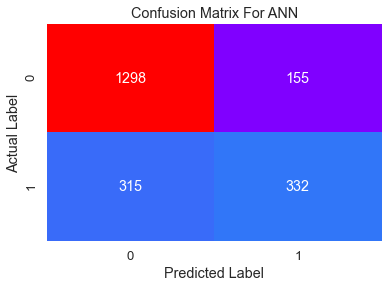

In [86]:
confusion_matrix(train_labels,ytrain_predict_nncl)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_nncl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix For ANN')
plt.show()

In [87]:
# Train data accuracy
nn_train_acc=best_grid_nncl.score(X_train,train_labels) 
nn_train_acc

0.7761904761904762

In [88]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1453
           1       0.68      0.51      0.59       647

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [89]:
nn_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.68
nn_train_recall  0.51
nn_train_f1  0.59


Area under Curve is 0.8166831721609928


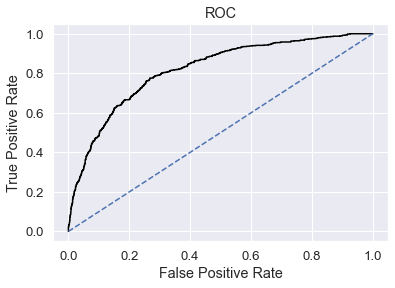

In [90]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

### Neural Network Model Confusion Matrix and Classification Report for the Test data

In [91]:
confusion_matrix(test_labels,ytest_predict_nncl)

array([[553,  70],
       [138, 139]], dtype=int64)

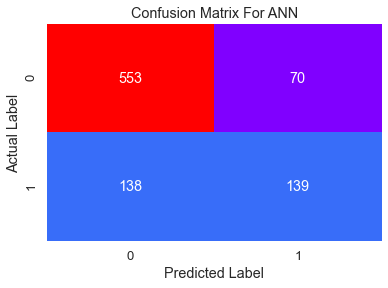

In [92]:
confusion_matrix(test_labels,ytest_predict_nncl)
sns.heatmap(confusion_matrix(test_labels,ytest_predict_nncl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix For ANN')
plt.show()

In [93]:
# Test data accuracy
nn_test_acc=best_grid_nncl.score(X_test,test_labels)
nn_test_acc

0.7688888888888888

In [94]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.50      0.57       277

    accuracy                           0.77       900
   macro avg       0.73      0.69      0.71       900
weighted avg       0.76      0.77      0.76       900



In [95]:
nn_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.67
nn_test_recall  0.5
nn_test_f1  0.57


Area under Curve is 0.8044225275393896


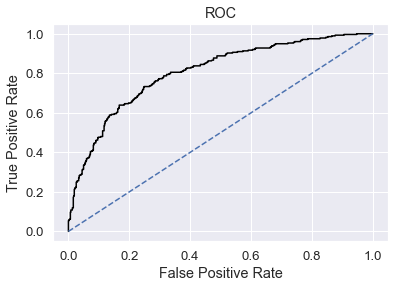

In [96]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

### Neural Network Conclusion

### Train Data:
- AUC: 82%
- Accuracy: 78%
- Precision: 68%
- f1-Score: 59

### Test Data:
- AUC: 80%
- Accuracy: 77%
- Precision: 67%
- f1-Score: 57%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

From the above ROC curve and score for testing and training data  we can say that:
- RF perform better than ANN and decision tree on test set as the AUC is greater for Random Forest
- ANN has least accuracy score for traing set.
- The accuracy for ANN is 77 % where as for RFCL is 79 % and DTC is 78 % , So we can say that RFCL has more accuracy followed by DTC then ANN

We can work around n_estimators for random forest and try grid_search or increase layers in ANN, to make better predictions.

F1 score and Accuracy is better for Random Forest compared to other two so both are important compared to predictions.



### Question 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

### Comparison of the performance metrics from the 3 models

In [97]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.80,0.78,0.80,0.79,0.78,0.77
AUC,0.83,0.81,0.86,0.82,0.82,0.80
Recall,0.60,0.58,0.61,0.56,0.51,0.50
Precision,0.69,0.66,0.72,0.68,0.68,0.67
F1 Score,0.65,0.62,0.66,0.62,0.59,0.57


### ROC Curve for the 3 models on the Training data


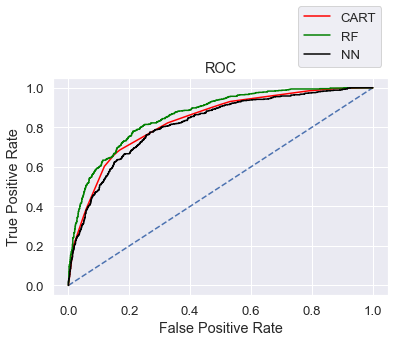

In [98]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve for the 3 models on the Test data

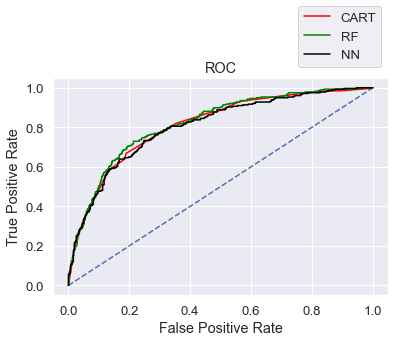

In [99]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### CONCLUSION :
I am selecting the RF model, as it has better accuracy, precsion, recall, f1 score better than other two CART & Neural Network.

Comparing all the models test data , we can say that Random Forest performs better than MLP Classifiers and Decision Tree Classifier from the overall ROC_AUC curve graph

The higher the AUC, The better the performance of the model,So the area under the curve is more for Random Forest it performs better.



### Question 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

- Using online the customers are benefitted, leading to an increase in conversions, which subsequently raised profits.

- As per the data 90% of insurance is done by online channel only.

- Almost all the offline business has an associate claimed with it, so we need to limit offline business to a maximum. And increase the sales in online and make more conditions in claims applied. Because associates know how to get the claim approved, so there is a possibility they may add some cooked up documents.

- More sales happen via Agency than Airlines and the trend shows the claims are processed more at Airline.

- In silver plan and gold plan the sales is high as well as the claim is also high, so in order to reduce the number of claims, we need to increase the premium amount and change in plans so that the claims will be less.

- In Destination “Asia” the claim is high so, the insurance company has to apply some more conditions on the clients who travel to Asia in order to avoid more claims. We can include conditions like if accident or death occurs by travelling in particular mode of vehicle or during own travel plan other than the vehicle assigned by travel agency, we will reject the claim because most of the accidents in ASIA occurs in road.


- The travel agency C2B has claimed more compared to others, so we have to set those slabs or conditions for insurance claims.
- The JZI agency’s sales are low, we have to give suggestions to increase their claim sales, like they need to give marketing campaigns or to have tie up with travel agencies.
- Based on the model we are getting almost 80% accuracy, so we need customer books airline tickets or plans, and more number of data’s.